# Лабораторная работа №2: Моделирование дискретных сигналов

Выполнили студенты гр. 2381 Ваньков Ярослав Сергеевич и Вакуленко Инна Юрьевна. Вариант №4.


## Цель работы

Освоение математических основ и программных средств моделирования и анализа дискретных сигналов различных типов: прямоугольных импульсов, гармонических сигналов, их линейных комбинаций, сигналов с огибающей и периодических последовательностей.


## Основные теоретические положения

### Дискретный прямоугольный импульс

$$s_1(k) = U \cdot [\sigma_d(k - n_0) - \sigma_d(k - (n_0 + n_{imp}))]$$

где $U$ — амплитуда, $n_0$ — начало импульса, $n_{imp}$ — длина импульса.

### Гармонические сигналы

$$x_i(k) = B_i \cdot \sin(\omega_i k), \quad i = 1,2,3$$

где $B_i$ — амплитуда, $\omega_i$ — частота.

### Линейная комбинация

$$s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k)$$

Характеристики сигнала:
- Среднее значение: $\mu = \frac{1}{M}\sum s_2(k)$
- Энергия: $E = \sum [s_2(k)]^2$
- Мощность: $P = \frac{E}{M}$

### Сигнал с экспоненциальной огибающей

$$s_3(k) = C \cdot \cos(\omega_0 k) \cdot |a|^k$$

Огибающая: $\pm |a|^k$

### Периодическая последовательность

$$s_4(k) = s_1(k \mod T)$$

где $T$ — период.


## Постановка задачи

Смоделировать следующие дискретные сигналы для варианта №4:

### Таблица параметров

| Параметр | Формула | Значение |
|----------|---------|----------|
| $N_b$ | Номер варианта | 4 |
| $N$ | $30 + (N_b \mod 5)$ | 34 |
| $a$ | $(-1)^{N_b} \cdot (0.8 + 0.005 \cdot (N_b \mod 20))$ | 0.82 |
| $C$ | $1 + (N_b \mod 5)$ | 5 |
| $\omega_0$ | $\pi/(6 + (N_b \mod 5))$ | π/10 ≈ 0.3142 |
| $U$ | $N_b$ | 4 |
| $n_0$ | $3 + (N_b \mod 5)$ | 7 |
| $n_{imp}$ | $5 + (N_b \mod 5)$ | 9 |
| $B_1$ | $1.5 + (N_b \mod 5)$ | 5.5 |
| $B_2$ | $5.7 - (N_b \mod 5)$ | 1.7 |
| $B_3$ | $2.2 + (N_b \mod 5)$ | 6.2 |
| $\omega_1$ | $\pi/(4 + (N_b \mod 5))$ | π/8 ≈ 0.3927 |
| $\omega_2$ | $\pi/(8 + (N_b \mod 5))$ | π/12 ≈ 0.2618 |
| $\omega_3$ | $\pi/(16 + (N_b \mod 5))$ | π/20 ≈ 0.1571 |
| $a_1$ | $1.5 - (N_b \mod 5)$ | -2.5 |
| $a_2$ | $0.7 + (N_b \mod 5)$ | 4.7 |
| $a_3$ | $1.4 + (N_b \mod 5)$ | 5.4 |
| $T$ | $2 \cdot n_{imp}$ | 18 |


## Выполнение работы


In [1]:
# Импорт библиотек
import math
import numpy as np
import matplotlib.pyplot as plt

# Настройка
plt.rcParams['font.size'] = 10


In [2]:
# Параметры варианта 4
Nb = 4
N = 30 + (Nb % 5)  # 34
a = ((-1) ** Nb) * (0.8 + 0.005 * (Nb % 20))  # 0.82
C = 1 + (Nb % 5)  # 5
w0 = math.pi / (6 + (Nb % 5))  # π/10
U = Nb  # 4
n0 = 3 + (Nb % 5)  # 7
n_imp = 5 + (Nb % 5)  # 9
B1 = 1.5 + (Nb % 5)  # 5.5
B2 = 5.7 - (Nb % 5)  # 1.7
B3 = 2.2 + (Nb % 5)  # 6.2
w1 = math.pi / (4 + (Nb % 5))  # π/8
w2 = math.pi / (8 + (Nb % 5))  # π/12
w3 = math.pi / (16 + (Nb % 5))  # π/20
a1 = 1.5 - (Nb % 5)  # -2.5
a2 = 0.7 + (Nb % 5)  # 4.7
a3 = 1.4 + (Nb % 5)  # 5.4
T_period = 2 * n_imp  # 18

print(f"Параметры варианта {Nb}:")
print(f"N={N}, a={a:.2f}, C={C}, U={U}, n0={n0}, n_imp={n_imp}, T={T_period}")


Параметры варианта 4:
N=34, a=0.82, C=5, U=4, n0=7, n_imp=9, T=18


In [3]:
# Функции сигналов
def sigma_d(k):
    return int(k >= 0)

def s1(k):  # Прямоугольный импульс
    return U * (sigma_d(k - n0) - sigma_d(k - (n0 + n_imp)))

def x1(k):  # Гармонический 1
    return B1 * math.sin(w1 * k)

def x2(k):  # Гармонический 2
    return B2 * math.sin(w2 * k)

def x3(k):  # Гармонический 3
    return B3 * math.sin(w3 * k)

def s2(k):  # Линейная комбинация
    return a1 * x1(k) + a2 * x2(k) + a3 * x3(k)

def s3_wrap(k):  # Огибающая
    return abs(a) ** k

def s3(k):  # Сигнал с огибающей
    return C * math.cos(w0 * k) * s3_wrap(k)

def s4(k):  # Периодическая последовательность
    return s1(k % T_period)


### 1. Прямоугольный импульс s₁(k)


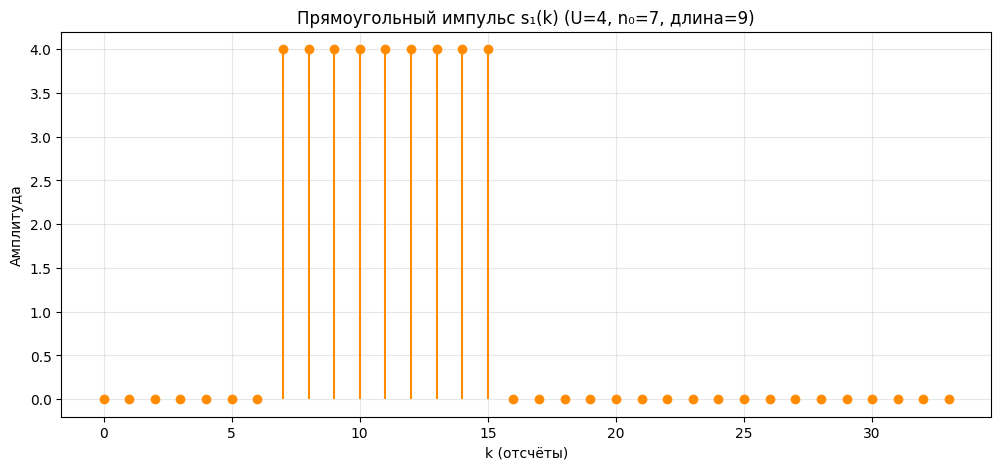

Импульс начинается в k=7, заканчивается в k=15


In [4]:
Xn = list(range(N))
s1_Y = [s1(k) for k in Xn]

plt.figure(figsize=(12, 5))
plt.stem(Xn, s1_Y, linefmt='darkorange', markerfmt='o', basefmt=' ')
plt.xlabel('k (отсчёты)')
plt.ylabel('Амплитуда')
plt.title(f'Прямоугольный импульс s₁(k) (U={U}, n₀={n0}, длина={n_imp})')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Импульс начинается в k={n0}, заканчивается в k={n0+n_imp-1}")


### 2. Гармонические сигналы x₁(k), x₂(k), x₃(k)


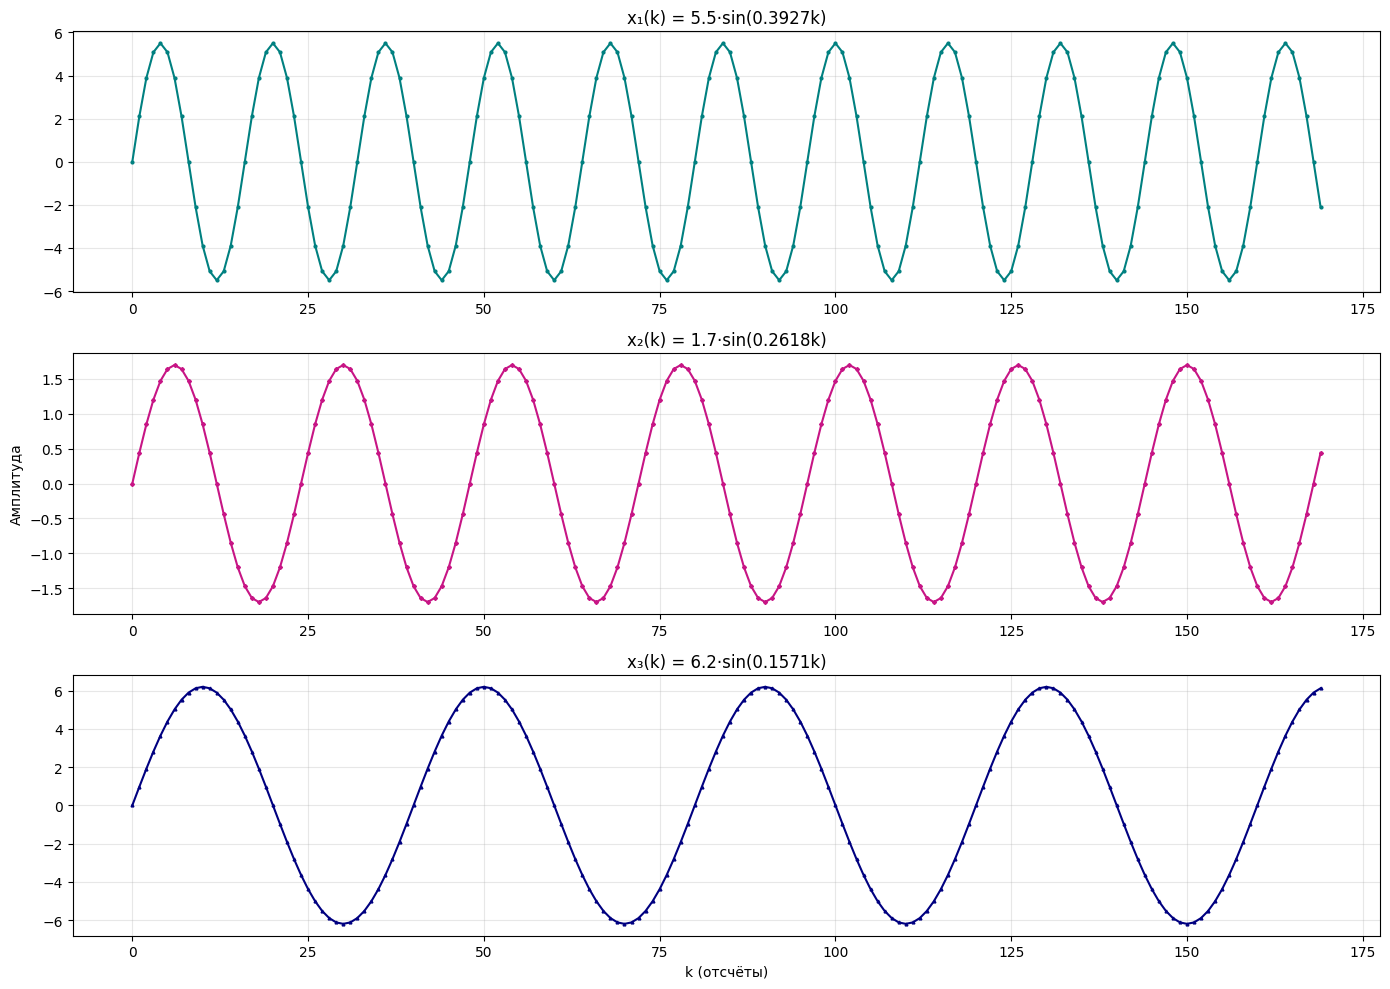

Частоты: ω₁=0.3927, ω₂=0.2618, ω₃=0.1571


In [5]:
Xn5 = list(range(N * 5))  # Расширенный интервал
x1_Y = [x1(k) for k in Xn5]
x2_Y = [x2(k) for k in Xn5]
x3_Y = [x3(k) for k in Xn5]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 10))

ax1.plot(Xn5, x1_Y, 'o-', color='teal', linewidth=1.5, markersize=2)
ax1.set_title(f'x₁(k) = {B1}·sin({w1:.4f}k)')
ax1.grid(True, alpha=0.3)

ax2.plot(Xn5, x2_Y, 'D-', color='mediumvioletred', linewidth=1.5, markersize=2)
ax2.set_ylabel('Амплитуда')
ax2.set_title(f'x₂(k) = {B2:.1f}·sin({w2:.4f}k)')
ax2.grid(True, alpha=0.3)

ax3.plot(Xn5, x3_Y, '^-', color='navy', linewidth=1.5, markersize=2)
ax3.set_xlabel('k (отсчёты)')
ax3.set_title(f'x₃(k) = {B3}·sin({w3:.4f}k)')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Частоты: ω₁={w1:.4f}, ω₂={w2:.4f}, ω₃={w3:.4f}")


### 3. Линейная комбинация s₂(k)


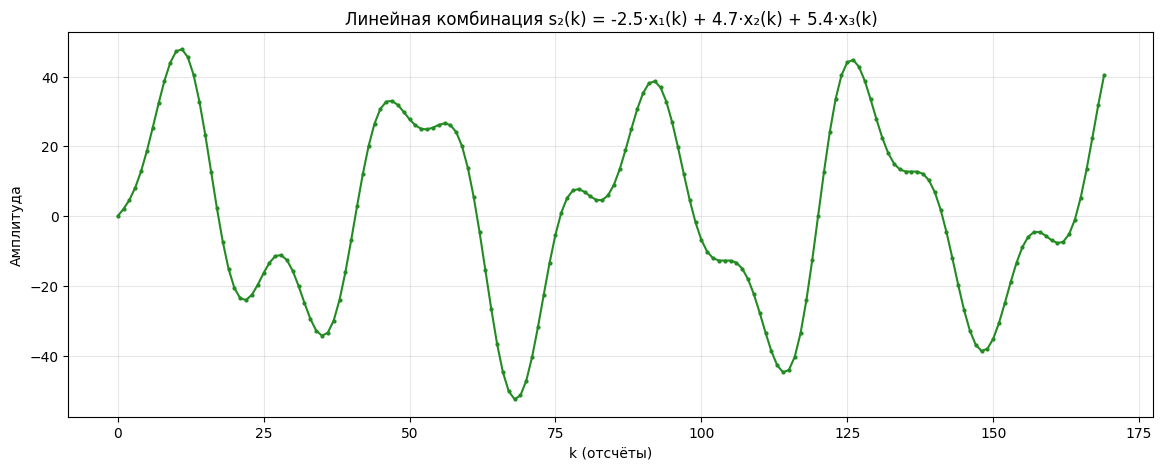

Характеристики сигнала s₂(k):
  Среднее значение: μ = 0.7892
  Энергия: E = 110847.79
  Мощность: P = 652.0458


In [6]:
s2_Y = [s2(k) for k in Xn5]

plt.figure(figsize=(14, 5))
plt.plot(Xn5, s2_Y, 'o-', color='forestgreen', linewidth=1.5, markersize=2)
plt.xlabel('k (отсчёты)')
plt.ylabel('Амплитуда')
plt.title(f'Линейная комбинация s₂(k) = {a1}·x₁(k) + {a2}·x₂(k) + {a3}·x₃(k)')
plt.grid(True, alpha=0.3)
plt.show()

# Характеристики сигнала
mean_s2 = sum(s2_Y) / len(s2_Y)
E_s2 = sum(s ** 2 for s in s2_Y)
P_s2 = E_s2 / len(s2_Y)

print("Характеристики сигнала s₂(k):")
print(f"  Среднее значение: μ = {mean_s2:.4f}")
print(f"  Энергия: E = {E_s2:.2f}")
print(f"  Мощность: P = {P_s2:.4f}")


### 4. Сигнал с экспоненциальной огибающей s₃(k)


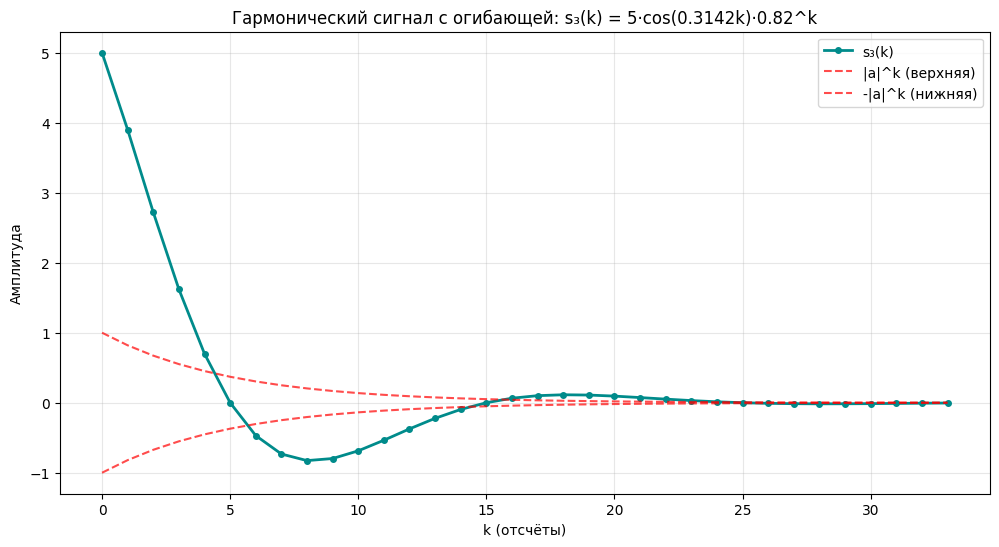

Огибающая затухает по закону 0.82^k, т.к. |a| = 0.82 < 1


In [7]:
s3_Y = [s3(k) for k in Xn]
s3_wrap_Y = [s3_wrap(k) for k in Xn]
s3_wrap_Y_neg = [-y for y in s3_wrap_Y]

plt.figure(figsize=(12, 6))
plt.plot(Xn, s3_Y, 'o-', color='darkcyan', linewidth=2, markersize=4, label='s₃(k)')
plt.plot(Xn, s3_wrap_Y, '--', color='red', linewidth=1.5, alpha=0.7, label='|a|^k (верхняя)')
plt.plot(Xn, s3_wrap_Y_neg, '--', color='red', linewidth=1.5, alpha=0.7, label='-|a|^k (нижняя)')
plt.xlabel('k (отсчёты)')
plt.ylabel('Амплитуда')
plt.title(f'Гармонический сигнал с огибающей: s₃(k) = {C}·cos({w0:.4f}k)·{a:.2f}^k')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Огибающая затухает по закону {a:.2f}^k, т.к. |a| = {abs(a):.2f} < 1")


### 5. Периодическая последовательность s₄(k)


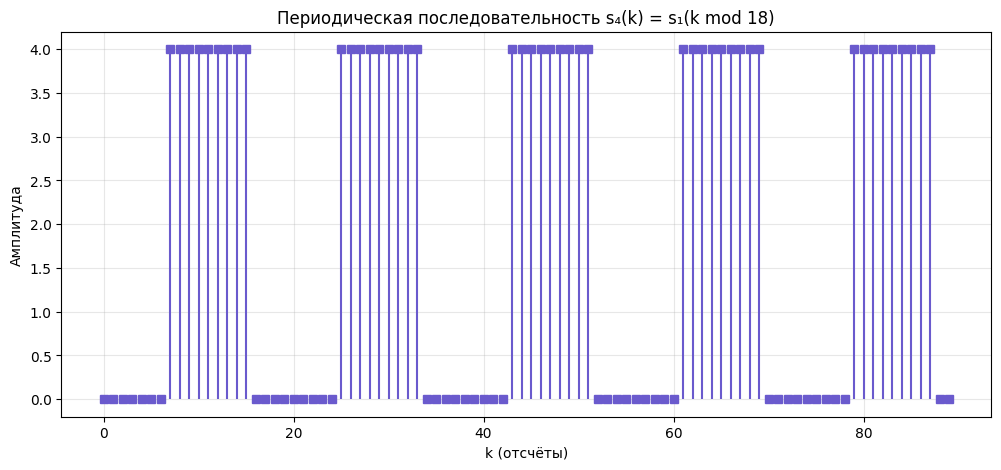

Период T = 18, показано 5 периодов


In [8]:
Xs4 = list(range(T_period * 5))  # 5 периодов
s4_Y = [s4(k) for k in Xs4]

plt.figure(figsize=(12, 5))
plt.stem(Xs4, s4_Y, linefmt='slateblue', markerfmt='s', basefmt=' ')
plt.xlabel('k (отсчёты)')
plt.ylabel('Амплитуда')
plt.title(f'Периодическая последовательность s₄(k) = s₁(k mod {T_period})')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Период T = {T_period}, показано {len(Xs4)//T_period} периодов")


## Выводы

В ходе выполнения лабораторной работы были смоделированы различные типы дискретных сигналов и изучены их свойства.

**Получены следующие результаты:**

1. **Прямоугольный импульс** $s_1(k)$ с параметрами $U=4$, $n_0=7$, $n_{imp}=9$ смоделирован и отображён. Импульс имеет постоянную амплитуду на интервале [7, 15] и равен нулю вне его.

2. **Три гармонических сигнала** $x_1(k)$, $x_2(k)$, $x_3(k)$ с различными амплитудами ($B_1=5.5$, $B_2=1.7$, $B_3=6.2$) и частотами ($\omega_1=\pi/8$, $\omega_2=\pi/12$, $\omega_3=\pi/20$) представляют собой синусоидальные колебания различной частоты и амплитуды.

3. **Линейная комбинация** $s_2(k) = -2.5 \cdot x_1(k) + 4.7 \cdot x_2(k) + 5.4 \cdot x_3(k)$ формирует сложный сигнал. Рассчитаны его характеристики:
   - Среднее значение: $\mu \approx 0.79$
   - Энергия: $E \approx 110847.79$
   - Мощность: $P \approx 652.05$

4. **Сигнал с экспоненциальной огибающей** $s_3(k) = 5 \cdot \cos(\pi k/10) \cdot 0.82^k$ демонстрирует затухающие колебания. Огибающая $\pm |a|^k$ определяет границы амплитуды, убывающие со временем.

5. **Периодическая последовательность** $s_4(k)$ с периодом $T=18$ получена путём периодического повторения импульса $s_1(k)$. Каждый период содержит один импульс длительностью 9 отсчётов.

6. Освоены навыки моделирования сложных дискретных сигналов, расчёта их статистических характеристик (среднее, энергия, мощность) и визуализации результатов.

**Цель работы достигнута:** получены практические навыки моделирования и анализа различных типов дискретных сигналов с использованием Python.
